# What are convnets?

[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/convnets/blob/master/learn/01_what_are_convnets.ipynb)

A convolutional neural network (CNN), or *convnet*, is a type of deep learning neural network that is primarily used for image and video processing. It is designed to automatically and adaptively learn spatial hierarchies of features from input data, such as images, by applying convolutional layers that filter the input data to extract features, and then pooling layers that down-sample the data to reduce its dimensionality. Convnets are widely used in various applications such as object detection, image classification, semantic segmentation, face recognition, and so on.

*Source: ChatGPT*

![gif](https://thumbs.gfycat.com/AffectionateMemorableGreyhounddog-size_restricted.gif)

The main element in a convnet is the convolutional layer, which is a type of layer that applies a convolution operation to the input data. 

> If you don't know what a convolution is, please check [what are convolutions?](00_what_are_convolutions.ipynb)

In [1]:
import torch

torch.__version__

'2.0.0.dev20230112+cu117'

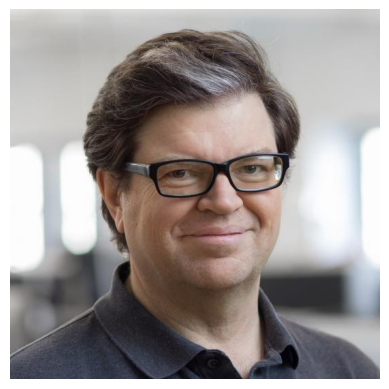

In [2]:
# read image

import matplotlib.pyplot as plt

img = plt.imread('data/yann-lecun.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

To execute the layer, we need to convert our image to a float torch tensor, with an extra batch dimension at the beggining followed by the channels dimension (this is how Pytorch works 🤷‍♂️).

In [3]:
img_t = torch.from_numpy(img / 255).unsqueeze(0).float().permute(0, 3, 1, 2)

img_t.shape, img_t.dtype, img_t.min(), img_t.max()

(torch.Size([1, 3, 543, 543]), torch.float32, tensor(0.), tensor(1.))

In [4]:
conv = torch.nn.Conv2d(
        in_channels = 3, 
        out_channels = 16, 
        kernel_size=3, 
        stride=1, 
        padding=1
    )

output = conv(img_t)

output.shape

torch.Size([1, 16, 543, 543])

The main parameters of a convolutional layer are:

- `in_channels`: number of channels of the input tensor (in the first layer this is the number of channels of your image, for the rest you should use the output channels of the previous layer).
- `out_channels`: number of channels of the output data, also known as the number of filters or kernels.
- `kernel_size`: size of the convolutional kernel.
- `stride`: stride of the convolution, or by how many pixels the kernel is shifted.
- `padding`: padding of the input data, dummy values around the image.

You can find all the arguments in the Pytorch [docs](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html). There are also 1D and 3D variants to process 1D and 3D data, respectively (although they are not used as much as the 2D variant).

The shape of the output will depend on the input shape, the kernel size, the stride and the padding. The formula is:

$$\frac{W - K + 2P}{S} + 1$$

where, $W$ is the width of the input, $K$ is the kernel size, $P$ is the padding and $S$ is the stride. The same applies to the height.

> If you are running your model in an NVIDIA GPU with Tensor Cores running on reduced precision, you may see [performance gains](https://pytorch.org/tutorials/intermediate/memory_format_tutorial.html) using the `channels_last` memory format.

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
# benchmark implementations

conv = conv.to(device).half()
x = img_t.to(device).half().repeat(50, 1, 1, 1)

%timeit conv(x)

The slowest run took 4.63 times longer than the fastest. This could mean that an intermediate result is being cached.
44.4 µs ± 34.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
conv2 = conv.to(memory_format=torch.channels_last)
x = img_t.to(memory_format=torch.channels_last, device=device).half().repeat(50, 1, 1, 1)

%timeit conv2(x)

2.87 ms ± 3.62 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Convnets are made of a stack of convolutional layers, optionally including also other type of layers for pooling or normalization. Depending on the task we want to solve, fully connected layers can be used at the end of the network to perform the classification and regression or encoder-decoder architectures can be used to perform image segmentation and generation.

This repository contains implementations of common convnets, reusable blocks that you can use to build your own as well as utilities to handle data, data augmentation, training (supervised and unsupervised), evaluation and visualization.